## Data Gathering and Preparation 

We used two Breast Cancer Data Set:  [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and [The mini-MIAS database of mammograms](http://peipa.essex.ac.uk/info/mias.html)

### Data Set 1: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

The information of this dataset is shown in the table below. This is a binary problem that divides tumors into benign and malignant tumors.

|||||||
|--- |--- |--- |--- |--- |--- |
|Data Set Characteristics:|Multivariate|Number of Instances:|569|Area:|Life|
|Attribute Characteristics:|Real|Number of Attributes:|32|Date Donated|1995-11-01|
|Associated Tasks:|Classification|Missing Values?|No|Number of Web Hits:|689725|


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

#### Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)


Here are some samples of this data set: 

In [3]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from subprocess import check_output
data = pd.read_csv('data.csv')
data.head()  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As can be seen from the data in the above table, the `id` column and the `Unnamed: 32` column are meaningless, and the `diagnosis` column is a label column. The following code is to get features and categories.

In [2]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )


In the data set, 357 samples were benign and 212 samples were malignant, as shown in the figure below.

Number of Benign:  357
Number of Malignant :  212


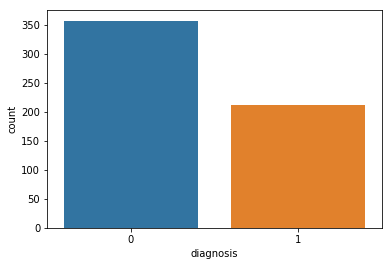

In [3]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Below we select features through the correlation coefficient. The correlation coefficient of each feature is shown in the figure below:

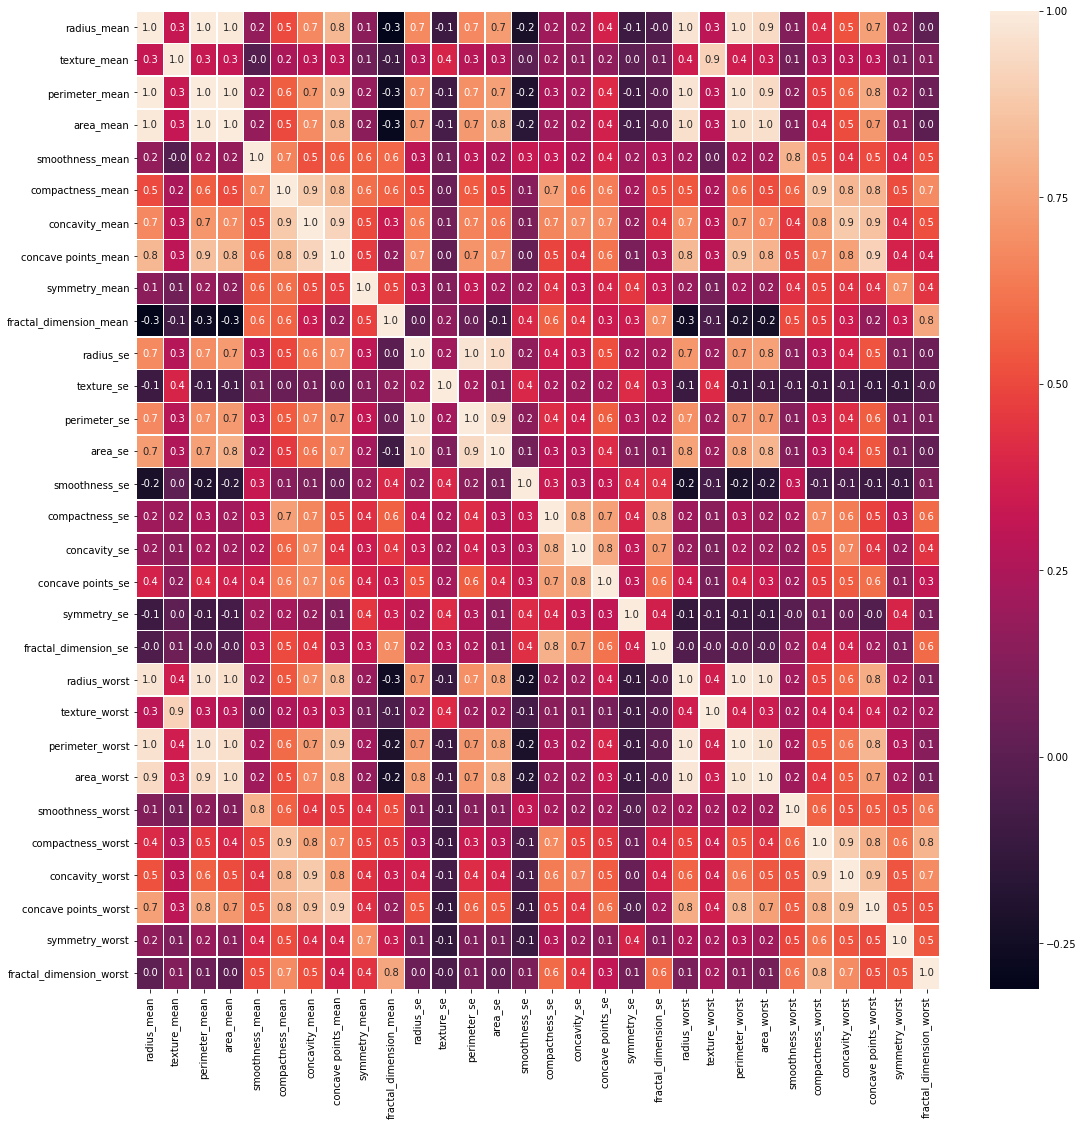

In [4]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

`Compactness_mean`, `concavity_mean` and `concave points_mean` are correlated with each other.Therefore we only choose `concavity_mean`. Apart from these, `radius_se`, `perimeter_se` and `area_se` are correlated and we only use `area_se`. `radius_worst`, `perimeter_worst` and `area_worst` are correlated so we use `area_worst`. `Compactness_worst`, `concavity_worst` and `concave points_worst` so we use `concavity_worst`. `Compactness_se`, `concavity_se` and `concave points_se` so we use `concavity_se`. `texture_mean` and `texture_worst` are correlated and we use `texture_mean`. `area_worst` and `area_mean` are correlated, we use `area_mean`.
So we remove the  correlation features as shown below:

In [5]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )   

Divide the training set and test set:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
x_train_dataset1, x_test_dataset1, y_train_dataset1, y_test_dataset1 = train_test_split(x_1, y, test_size=0.3, random_state=42)

Next, the five best features are selected by Chi-squared stats to get the final training data and test data.

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train_dataset1, y_train_dataset1)

The five selected features are as follows:

In [8]:
idx = np.argpartition(select_feature.scores_, -5)
print('Feature list:', x_train_dataset1.columns[idx[-5:]])

Feature list: Index(['concavity_mean', 'concavity_worst', 'texture_mean', 'area_mean',
       'area_se'],
      dtype='object')


In [9]:
x_train_dataset1 = select_feature.transform(x_train_dataset1)
x_test_dataset1 = select_feature.transform(x_test_dataset1)

### Data Set 2 [The mini-MIAS database of mammograms](http://peipa.essex.ac.uk/info/mias.html)
This dataset contains 1024\*1024 mammograms. The data reads are as follows:

In [10]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with h5py.File('all_mias_scans.h5', 'r') as f:
    mammo_df = pd.DataFrame(
        {k: v.value if len(v.shape)==1 else [sub_v for sub_v in v] 
         for k,v in f.items()})   
mammo_df.head()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,BG,CLASS,RADIUS,REFNUM,SEVERITY,X,Y,path,scan
0,b'G',b'CIRC',197.0,b'mdb001',b'B',535.0,425.0,b'mdb001.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,b'G',b'CIRC',69.0,b'mdb002',b'B',522.0,280.0,b'mdb002.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,b'D',b'NORM',NaN,b'mdb003',b'nan',NaN,NaN,b'mdb003.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,b'D',b'NORM',NaN,b'mdb004',b'nan',NaN,NaN,b'mdb004.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,b'F',b'CIRC',30.0,b'mdb005',b'B',477.0,133.0,b'mdb005.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


We use this dataset as a multi-classification task, so we only use the `CLASS` column of the above data, and the image data in the `scan` column. The `CLASS` category will be encoded  below.

In [11]:
from sklearn.preprocessing import LabelEncoder
class_enc = LabelEncoder()
mammo_df['CLASS_ID'] = class_enc.fit_transform(mammo_df['CLASS'])
mammo_df.head()

,BG,CLASS,RADIUS,REFNUM,SEVERITY,X,Y,path,scan,CLASS_ID
0,b'G',b'CIRC',197.0,b'mdb001',b'B',535.0,425.0,b'mdb001.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
1,b'G',b'CIRC',69.0,b'mdb002',b'B',522.0,280.0,b'mdb002.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
2,b'D',b'NORM',NaN,b'mdb003',b'nan',NaN,NaN,b'mdb003.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5
3,b'D',b'NORM',NaN,b'mdb004',b'nan',NaN,NaN,b'mdb004.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5
4,b'F',b'CIRC',30.0,b'mdb005',b'B',477.0,133.0,b'mdb005.pgm',"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3


The distribution of the categories is shown below. It can be seen that the distribution of each category is very uneven.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2ec0db8d0>]],
      dtype=object)

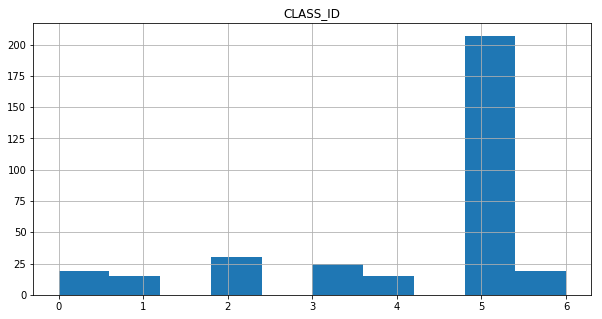

In [12]:
mammo_df[['CLASS_ID']].hist(figsize = (10, 5))

We upsampling to balance the training data category.

train 247 validation 83
New Data Size: 700 Old Size: 247


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2ec07b278>]],
      dtype=object)

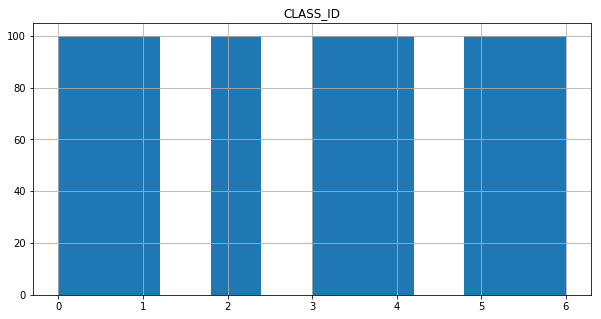

In [13]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(mammo_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = mammo_df[['CLASS_ID']])
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train_df = raw_train_df.groupby(['CLASS']).apply(lambda x: x.sample(100, replace = True)
                                                      ).reset_index(drop = True)
print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])
train_df[['CLASS_ID']].hist(figsize = (10, 5))

Finally, because the pixel 1024\*1024 of the input image is too large, we shrink the image to 64\*64 to get the final input data.

In [14]:
def get_data_from_pd(pd_data):
    scan_lr = []
    for i in range(pd_data.shape[0]):
        scan_lr.append(np.array(pd_data['scan'])[i][::16, ::16])
    scan_lr = np.array(scan_lr)
    x = scan_lr.reshape((scan_lr.shape[0], -1))
    y = np.array(pd_data['CLASS_ID'])
    return x, y
x_train_dataset2, y_train_dataset2 = get_data_from_pd(train_df)
x_test_dataset2, y_test_dataset2 = get_data_from_pd(valid_df)


## Model Selection, Comparison and Cross Validation
The roc curve function:

In [15]:
from sklearn import metrics

def analyze_roc(mod,X1,y1,X2,y2):
    ytrain_pred = mod.predict_proba(X1)
    ytest_pred = mod.predict_proba(X2)
    # Results have probabilities for results [0,1]

    roc_train = metrics.roc_curve(y1,ytrain_pred[:,1])
    roc_test = metrics.roc_curve(y2,ytest_pred[:,1])

    roc_auc_train = metrics.roc_auc_score(y1,ytrain_pred[:,1])
    roc_auc_test = metrics.roc_auc_score(y2,ytest_pred[:,1])

    print('ROC Area-under-curve for training set: {:0.3}'.format(roc_auc_train))
    print('ROC Area-under-curve for validation set: {:0.3}'.format(roc_auc_test))


    fig = plt.figure(1,figsize=[6,6])
    plt.plot(roc_train[0],roc_train[1],label='Test set',c='b')
    plt.plot(roc_test[0],roc_test[1],label='Validation set',c='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    
def analyze_prec_recall(mod,X1,y1,X2,y2):
    ytrain_pred = mod.predict_proba(X1)
    ytest_pred = mod.predict_proba(X2)
    # Results have probabilities for results [0,1]

    roc_train = metrics.precision_recall_curve(y1,ytrain_pred[:,1])
    roc_test = metrics.precision_recall_curve(y2,ytest_pred[:,1])

    roc_auc_train = metrics.average_precision_score(y1,ytrain_pred[:,1])
    roc_auc_test = metrics.average_precision_score(y2,ytest_pred[:,1])

    print('Ave. precision score for training set: {:0.3}'.format(roc_auc_train))
    print('Ave. precision score for validation set: {:0.3}'.format(roc_auc_test))


    fig = plt.figure(1,figsize=[6,6])
    plt.step(roc_train[1],roc_train[0],label='Test set',c='b')
    plt.step(roc_test[1],roc_test[0],label='Validation set',c='r')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()

Use GridSearchCV to find the best parameters:

In [16]:
from sklearn.model_selection import GridSearchCV
def Classification_model_gridsearchCV(model,param_grid,train_X,train_y, test_X, test_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print (clf.score(test_X,test_y))

### Data Set 1
Use the SVM classifier:

ROC Area-under-curve for training set: 1.0
ROC Area-under-curve for validation set: 0.85


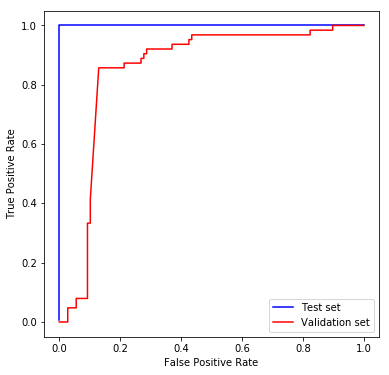

Ave. precision score for training set: 1.0
Ave. precision score for validation set: 0.663


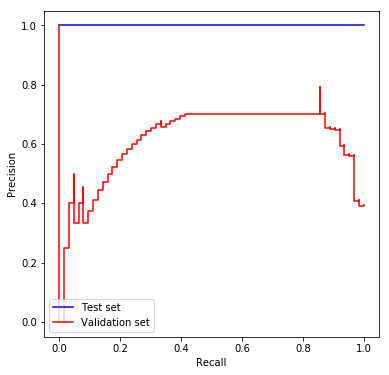

In [17]:
from sklearn import svm
from sklearn import metrics 
model = svm.SVC(probability=True)
model.fit(x_train_dataset1,y_train_dataset1)
prediction=model.predict(x_test_dataset1)
metrics.accuracy_score(prediction,y_test_dataset1)
analyze_roc(model,x_train_dataset1,y_train_dataset1,
                                  x_test_dataset1,y_test_dataset1)
analyze_prec_recall(model,x_train_dataset1,y_train_dataset1,
                                  x_test_dataset1,y_test_dataset1)

Use a decision tree classifier:

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_dataset1,y_train_dataset1)
prediction=model.predict(x_test_dataset1)
metrics.accuracy_score(prediction,y_test_dataset1)


0.9122807017543859

Use GridSearchCV to find the best parameters:

In [19]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,x_train_dataset1,y_train_dataset1,
                                  x_test_dataset1,y_test_dataset1)

The best parameter found on development set is :
{'kernel': 'linear', 'C': 10}
0.9649122807017544


In [20]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,x_train_dataset1,y_train_dataset1,
                                 x_test_dataset1,y_test_dataset1)

The best parameter found on development set is :
{'min_samples_leaf': 2, 'max_features': 'log2', 'min_samples_split': 5}
0.9532163742690059


### Data Set 2
Use the SVM classifier:

In [21]:
model = svm.SVC()
model.fit(x_train_dataset2,y_train_dataset2)
prediction=model.predict(x_test_dataset2)
metrics.accuracy_score(prediction,y_test_dataset2)

0.6626506024096386

Use a decision tree classifier:

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train_dataset2,y_train_dataset2)
prediction=model.predict(x_test_dataset2)
metrics.accuracy_score(prediction,y_test_dataset2)

0.3373493975903614

Use GridSearchCV to find the best parameters:

In [39]:
model=svm.SVC()
param_grid = [
              {'C': [0.1, 1, 10, 100], 
               'kernel': ['linear']
              },
              {'C': [0.1, 1, 10, 100], 
               'gamma': [0.01, 0.001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,x_train_dataset2,y_train_dataset2,
                                 x_test_dataset2,y_test_dataset2)

The best parameter found on development set is :
{'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.6626506024096386


In [40]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5], 
              'min_samples_leaf':[1,2,3,4,5] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,x_train_dataset2,y_train_dataset2,
                                 x_test_dataset2,y_test_dataset2)

The best parameter found on development set is :
{'min_samples_leaf': 1, 'max_features': 'log2', 'min_samples_split': 4}
0.3614457831325301


### BONUS
We used pretrained models VGG16 to recognize mammography ，since Global Average Pooling is too simplistic since some of the regions are more relevant than others. So we used an attention mechanism.

In [4]:
from skimage.io import imread
import os
from glob import glob
import h5py


In [5]:
tif_dir = 'tiffs'
#s.makedirs(tif_dir)
with h5py.File('all_mias_scans.h5', 'r') as f:
    mammo_df = pd.DataFrame(
        {k: v.value if len(v.shape)==1 else [sub_v for sub_v in v] 
         for k,v in f.items()}
    )
for k in mammo_df.columns:
    if isinstance(mammo_df[k].values[0], bytes):
        mammo_df[k] = mammo_df[k].map(lambda x: x.decode())
# save data to disk
from skimage.io import imsave
def to_path(c_row):
    out_path = os.path.join(tif_dir, '%s.tif' % c_row['REFNUM'])
    imsave(out_path, c_row['scan'])
    return out_path
mammo_df['scan'] = mammo_df.apply(to_path,1)
mammo_df.sample(5)

,BG,CLASS,RADIUS,REFNUM,SEVERITY,X,Y,path,scan
201,D,SPIC,31.0,mdb199,B,641.0,177.0,mdb199.pgm,tiffs/mdb199.tif
48,G,NORM,NaN,mdb048,nan,NaN,NaN,mdb048.pgm,tiffs/mdb048.tif
277,G,CIRC,72.0,mdb270,M,356.0,945.0,mdb270.pgm,tiffs/mdb270.tif
26,F,NORM,NaN,mdb026,nan,NaN,NaN,mdb026.pgm,tiffs/mdb026.tif
134,F,NORM,NaN,mdb133,nan,NaN,NaN,mdb133.pgm,tiffs/mdb133.tif


In [38]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
class_enc = LabelEncoder()
mammo_df['CLASS_ID'] = class_enc.fit_transform(mammo_df['CLASS'])
mammo_df['CLASS_VEC'] = mammo_df['CLASS_ID'].map(lambda x: to_categorical(x, 
                                                                          num_classes=len(class_enc.classes_)))

from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(mammo_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = mammo_df[['CLASS_ID', 'SEVERITY']])
train_df = raw_train_df.groupby(['CLASS', 'SEVERITY']).apply(lambda x: x.sample(100, replace = True)
                                                      ).reset_index(drop = True)
print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])


New Data Size: 1300 Old Size: 247


In [39]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
IMG_SIZE = (192, 192) 
core_idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.15, 
                              width_shift_range = 0.15, 
                              rotation_range = 5, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.2,
                             preprocessing_function = preprocess_input)

In [40]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    return df_gen

In [41]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'scan',
                            y_col = 'CLASS_VEC', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'scan',
                            y_col = 'CLASS_VEC', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 256) 
test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'scan',
                            y_col = 'CLASS_VEC', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1024)) 


## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.


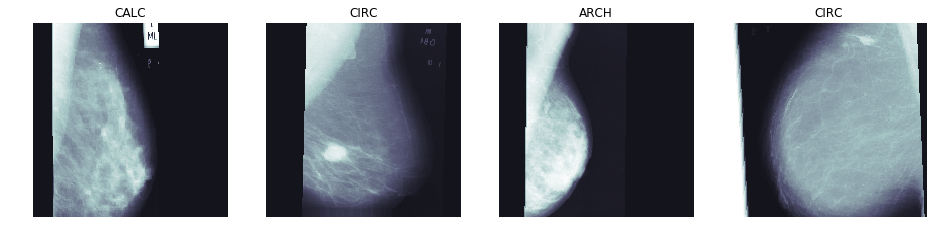

In [42]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(1, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -127, vmax = 127)
    c_ax.set_title('%s' % (class_enc.classes_[np.argmax(c_y,-1)]))
    c_ax.axis('off')

In [43]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
in_lay = Input(t_x.shape[1:])
base_pretrained_model = VGG16(input_shape =  t_x.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1, 
                                kernel_size = (1,1), 
                                padding = 'valid', 
                                activation = 'sigmoid')(attn_layer)
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(128, activation = 'elu')(gap_dr))
out_layer = Dense(len(class_enc.classes_), activation = 'softmax')(dr_steps) 
mammo_model = Model(inputs = [in_lay], outputs = [out_layer])

mammo_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

#mammo_model.summary()

In [44]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('mammo_result')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=2, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=2, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) 
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [45]:
mammo_model.fit_generator(train_gen, 
                                  steps_per_epoch = 35,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 30, 
                                  callbacks = callbacks_list)

Epoch 1/30
41/35 [===================================] - 7s 167ms/step - loss: 1.7398 - val_loss: 2.7595
Epoch 2/30
41/35 [===================================] - 6s 147ms/step - loss: 1.3824 - val_loss: 2.6795
Epoch 3/30
41/35 [===================================] - 6s 153ms/step - loss: 1.2184 - val_loss: 2.5360
Epoch 4/30
41/35 [===================================] - 6s 153ms/step - loss: 1.0657 - val_loss: 2.4332
Epoch 5/30
41/35 [===================================] - 6s 151ms/step - loss: 0.9619 - val_loss: 2.2508
Epoch 6/30
41/35 [===================================] - 6s 156ms/step - loss: 0.9561 - val_loss: 2.2882
Epoch 7/30
41/35 [===================================] - 6s 158ms/step - loss: 0.8755 - val_loss: 2.2940
Epoch 8/30
41/35 [===================================] - 7s 159ms/step - loss: 0.7892 - val_loss: 2.1981
Epoch 9/30
41/35 [===================================] - 6s 158ms/step - loss: 0.7250 - val_loss: 2.3252
Epoch 10/30
41/35 [===================================]

In [46]:
mammo_model.load_weights(weight_path)

In [47]:
for attn_layer in mammo_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

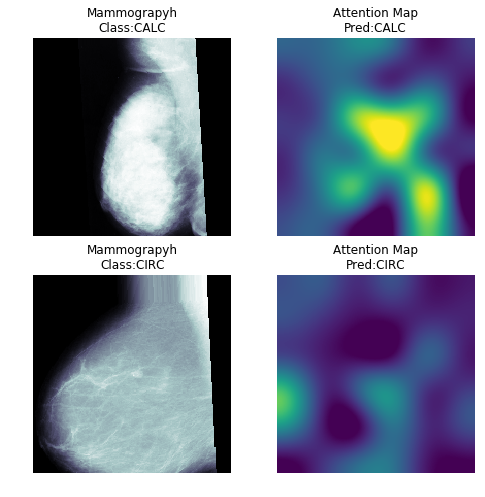

In [68]:
import keras.backend as K
rand_idx = np.random.choice(range(len(test_X)), size = 2)
attn_func = K.function(inputs = [mammo_model.get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    real_label = class_enc.classes_[np.argmax(test_Y[c_idx])]
    img_ax.set_title('Mammograpyh\nClass:%s' % (real_label))
    pred_confidence = class_enc.classes_[np.argmax(mammo_model.predict(cur_img)[0],-1)]
    attn_ax.set_title('Attention Map\nPred:%s' % (pred_confidence))
fig.savefig('attention_map.png', dpi = 300)
